In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import random
import graphviz
from sklearn.tree import export_graphviz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##Exploring Data

In [2]:
train_data=pd.read_csv("train.csv",index_col=[0])
test_data=pd.read_csv("test.csv",index_col=[0])

In [83]:
train_data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [57]:
train_data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [58]:
train_data['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [59]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [62]:
train_data[train_data.isnull().any(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


##Cleaning Data and perfoming one hot encoding

In [3]:
dummy_column=['Gender','Customer Type','Type of Travel','Class']

In [4]:
def data_cleaning(data):
  data.drop('id',axis=1,inplace=True)
  data=pd.get_dummies(data,columns=dummy_column)
  data.dropna(inplace=True)
  data['sentiment']=data['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)
  data.drop('satisfaction',axis=1,inplace=True)
  return data


In [5]:
training_data=data_cleaning(train_data)
testing_data=data_cleaning(test_data)

In [104]:
training_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,sentiment
0,13,460,3,4,3,1,5,3,5,5,...,0,1,1,0,0,1,0,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,0,1,0,1,1,0,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,0,1,0,1,0,1,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,1,0,1,0,1,0,1,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,1,0,0,1,1,0,0,1,0,0
103900,49,2347,4,4,4,4,2,4,5,5,...,0,1,1,0,1,0,1,0,0,1
103901,30,1995,1,1,1,3,4,1,5,4,...,0,1,0,1,1,0,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,1,0,0,1,1,0,0,1,0,0


In [105]:
testing_data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,sentiment
0,52,160,5,4,3,4,3,4,3,5,...,1,0,1,0,1,0,0,1,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,1,0,1,0,1,0,1,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,0,1,0,1,1,0,0,1,0,0
3,44,3377,0,0,0,2,3,4,4,1,...,0,1,1,0,1,0,1,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,...,0,1,0,1,1,0,1,0,0,0
25972,23,646,4,4,4,4,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1
25973,17,828,2,5,1,5,2,1,2,2,...,1,0,1,0,0,1,0,1,0,0
25974,14,1127,3,3,3,3,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1


##Normalizing data and converting to numpy array

In [6]:
X_train=preprocessing.normalize(np.array(training_data)[:,:-1])
Y_train=np.array(training_data)[:,-1].reshape(-1,1)
X_test=preprocessing.normalize(np.array(testing_data)[:,:-1])
Y_test=np.array(testing_data)[:,-1].reshape(-1,1)

##Logistic Regression

In [129]:
logistic_model=LogisticRegression(random_state=10)

In [132]:
logistic_model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=10)

In [133]:
predictions=logistic_model.predict(X_test)

In [7]:
def report(Y,prediction):
  return (classification_report(Y,prediction),confusion_matrix(Y,prediction),accuracy_score(Y,prediction))

In [309]:
logistic_model_report,logistic_model_confusion_matrix,logistic_model_accuracy=report(Y_test,predictions)

In [206]:
print(logistic_model_report)

              precision    recall  f1-score   support

         0.0       0.61      0.95      0.75     14528
         1.0       0.80      0.23      0.36     11365

    accuracy                           0.64     25893
   macro avg       0.70      0.59      0.55     25893
weighted avg       0.69      0.64      0.57     25893



In [207]:
print(logistic_model_confusion_matrix)

[[13858   670]
 [ 8762  2603]]


In [208]:
logistic_model_accuracy

0.6357316649287452

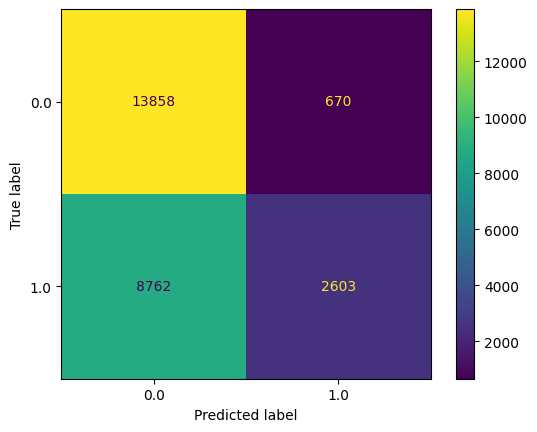

In [275]:
disp = ConfusionMatrixDisplay(confusion_matrix=logistic_model_confusion_matrix,
                               display_labels=logistic_model.classes_)
disp.plot()

##Majority Class Classifier

In [295]:
training_data['sentiment'].value_counts()

0    58697
1    44897
Name: sentiment, dtype: int64

In [300]:
majority_prediction=np.zeros(len(testing_data))

In [310]:
majority_report,majority_confusion_matrix,majority_accuracy=report(Y_test,majority_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [312]:
print(majority_report)
print(majority_confusion_matrix)
print(majority_accuracy)

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72     14528
         1.0       0.00      0.00      0.00     11365

    accuracy                           0.56     25893
   macro avg       0.28      0.50      0.36     25893
weighted avg       0.31      0.56      0.40     25893

[[14528     0]
 [11365     0]]
0.561078283706021


##Decision Tree

In [44]:
%%time
max_depth = [1, 5, 10, 15, 20, 25]
train_scores,test_scores = validation_curve(
    tree.DecisionTreeClassifier(),
    X_train,
    Y_train,
    param_name="max_depth",
    param_range=max_depth,
    cv=10,
    n_jobs=2
)

CPU times: user 717 ms, sys: 178 ms, total: 895 ms
Wall time: 1min 8s


In [247]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

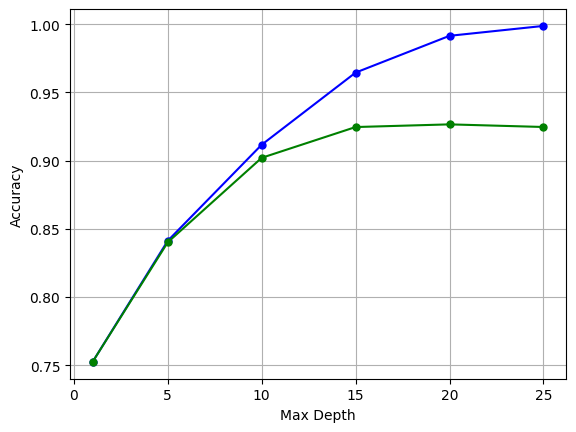

In [248]:
plt.plot(max_depth, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(max_depth, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

#### 20 is looking the best max_depth for decision tree

In [249]:
tree_model=tree.DecisionTreeClassifier(max_depth=20).fit(X_train,Y_train)

In [250]:
tree_predictions=tree_model.predict(X_test)

In [251]:
tree_report,tree_confusion_matrix,tree_accuracy=report(Y_test,tree_predictions)

In [252]:
print(tree_report)
print(tree_confusion_matrix)
print(tree_accuracy)

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     14528
         1.0       0.92      0.92      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.93      0.93     25893
weighted avg       0.93      0.93      0.93     25893

[[13664   864]
 [  956 10409]]
0.9297107326304407


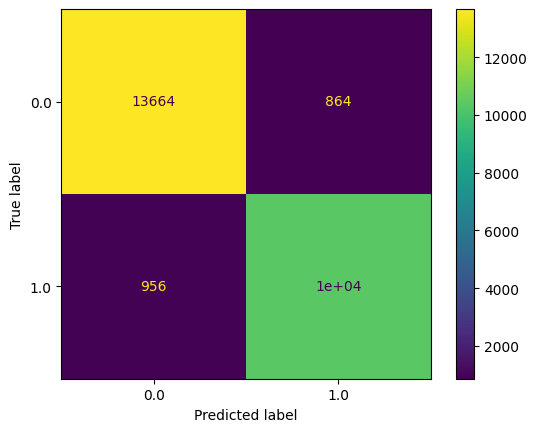

In [277]:
disp = ConfusionMatrixDisplay(confusion_matrix=tree_confusion_matrix,
                               display_labels=tree_model.classes_)
disp.plot()

##Random Forest

In [32]:
param_dist = {'n_estimators': [random.randint(50,300)],
              'max_depth': [random.randint(1,20)]}

In [29]:
rf=RandomForestClassifier()

In [33]:
rf_models = RandomizedSearchCV(rf,param_distributions = param_dist,n_iter=5,cv=5)

In [34]:
rf_models.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [18],
                                        'n_estimators': [291]})

In [36]:
best_rf_model=rf_models.best_estimator_
print('Best hyperparameters:',  rf_models.best_params_)

Best hyperparameters: {'n_estimators': 291, 'max_depth': 18}


In [37]:
rf_predictions=best_rf_model.predict(X_test)

In [38]:
rf_report,rf_confusion_matrix,rf_accuracy=report(Y_test,rf_predictions)

In [39]:
print(rf_report)
print(rf_confusion_matrix)
print(rf_accuracy)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     14528
         1.0       0.94      0.92      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893

[[13890   638]
 [  889 10476]]
0.9410265322674082


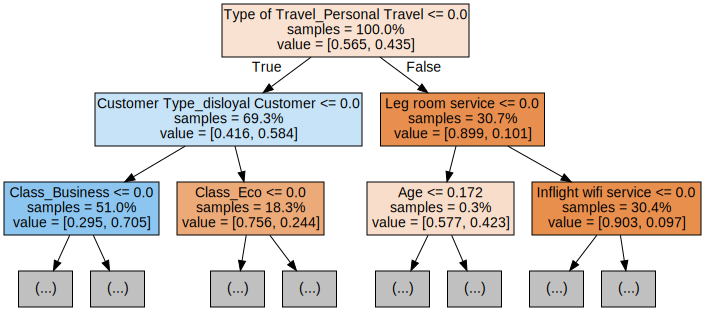

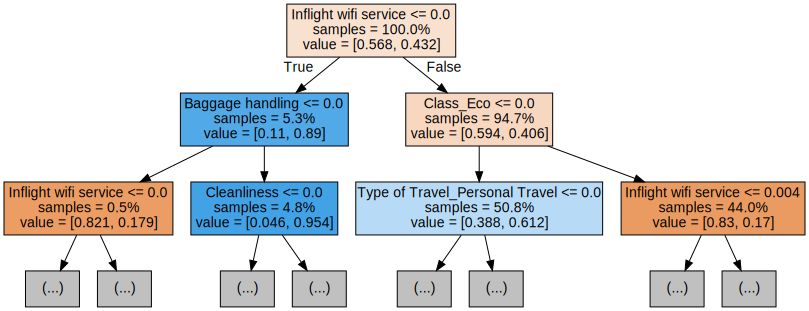

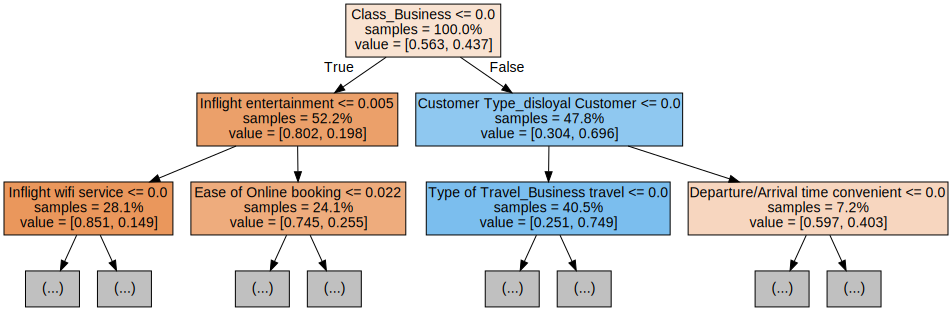

In [52]:
for i in range(3):
    tree = best_rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=list(training_data.columns)[:-1],
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

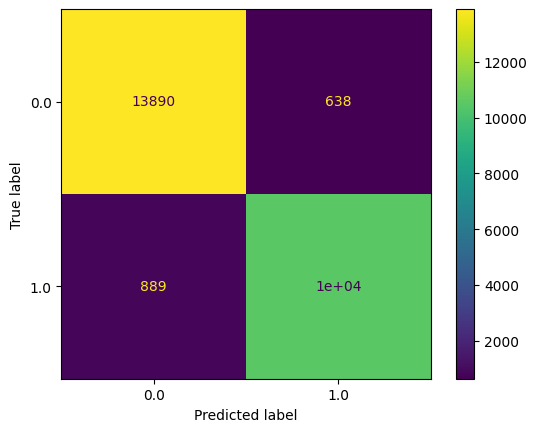

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_confusion_matrix,
                               display_labels=best_rf_model.classes_)
disp.plot()

##Neural Networks

In [256]:
tf.random.set_seed(123)
nn_model=Sequential(
    [
        Dense(64,activation='relu',name='L1'),
        Dense(32,activation='relu',name='L2'),
        Dense(1,activation='linear',name='final')
    ]
)

In [257]:
nn_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam'
)

In [259]:
nn_model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
3238/3238 [==============================] - 9s 3ms/step - loss: 0.4687
Epoch 2/100
3238/3238 [==============================] - 8s 2ms/step - loss: 0.4209
Epoch 3/100
3238/3238 [==============================] - 7s 2ms/step - loss: 0.3938
Epoch 4/100
3238/3238 [==============================] - 6s 2ms/step - loss: 0.3779
Epoch 5/100
3238/3238 [==============================] - 7s 2ms/step - loss: 0.3645
Epoch 6/100
3238/3238 [==============================] - 6s 2ms/step - loss: 0.3516
Epoch 7/100
3238/3238 [==============================] - 8s 2ms/step - loss: 0.3378
Epoch 8/100
3238/3238 [==============================] - 6s 2ms/step - loss: 0.3196
Epoch 9/100
3238/3238 [==============================] - 7s 2ms/step - loss: 0.2999
Epoch 10/100
3238/3238 [==============================] - 6s 2ms/step - loss: 0.2818
Epoch 11/100
3238/3238 [==============================] - 7s 2ms/step - loss: 0.2643
Epoch 12/100
3238/3238 [==============================] - 6s 2ms/step - lo

In [260]:
prediction_probablities=tf.nn.sigmoid(nn_model.predict(X_test))

810/810 [==============================] - 2s 3ms/step


In [262]:
nn_predictions=[1 if x>0.5 else 0 for x in prediction_probablities]

In [314]:
nn_model_report,nn_confusion_matrix,nn_accuracy=report(Y_test,nn_predictions)

In [265]:
print(nn_model_report)
print(nn_confusion_matrix)
print(nn_accuracy)

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     14528
         1.0       0.95      0.91      0.93     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.94      0.94     25893
weighted avg       0.94      0.94      0.94     25893

[[13985   543]
 [ 1038 10327]]
0.9389410265322674


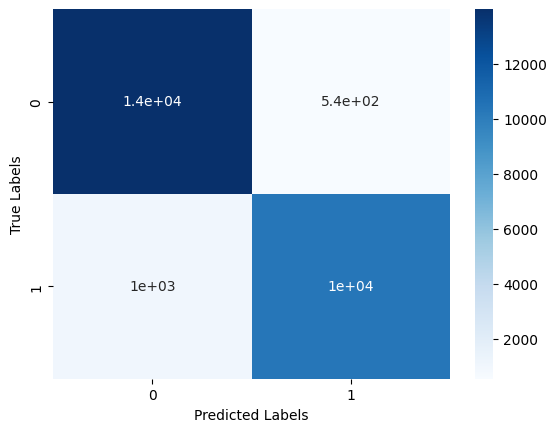

In [284]:
confusion_matrix = tf.math.confusion_matrix(Y_test, nn_predictions)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()